In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import edunn as nn
from edunn import utils

# Logistic Regression Model: `forward`

A Logistic Regression model is formed by applying the `Softmax` function to a Linear Regression model. This function converts the output vector of Linear Regression into a vector representing a probability distribution.

The function for Logistic Regression is $f(x) = softmax(wx + b)$. However, as we did with the `LinearRegression` model, we can view this model as the application of:
* A `Linear` layer $f(x) = wx$,
* A `Bias` layer $f(x) = x + b$,
* A `Softmax` layer $f(x) = softmax(x)$.

In other words, we have the following sequence of transformations: `x → Linear → Bias → Softmax → y`.

Implement the `forward` method of the `LogisticRegression` model in the `edunn/models/logistic_regression.py` file. For this, we have already defined and initialized internal class models `Linear`, `Bias`, and `Softmax`; you just need to call their respective `forward` methods in the correct order.

In [ ]:
x = np.array([[1,0],
             [0,1],
             [1,1]])

w = np.array([[100,0,0],
              [0,100,0],
              ])
b = np.array([0,0,0])
linear_initializer = nn.initializers.Constant(w)
bias_initializer = nn.initializers.Constant(b)
layer=nn.LogisticRegression(2,3,linear_initializer=linear_initializer,bias_initializer=bias_initializer)
y = np.array([[1, 0,0],
              [0, 1,0],
              [0.5,0.5,0]
             ])

utils.check_same(y,layer.forward(x))

y = np.array([[0, 0.5,0.5],
              [0.5, 0,0.5],
              [0,0,1]
             ])
linear_initializer = nn.initializers.Constant(-w)
bias_initializer = nn.initializers.Constant(-b)
layer=nn.LogisticRegression(2,3,linear_initializer=linear_initializer,bias_initializer=bias_initializer)
utils.check_same(y,layer.forward(x))



# Logistic Regression Model: `backward`

The `backward` method of a `LogisticRegression` model is the *inverse* composition of the `backward` methods of the `Linear`, `Bias`, and `Softmax` layers. Remember that these are applied in the reverse order compared to the `forward` method.

In this case, we also help you by combining the gradient dictionaries of each layer into a single large gradient dictionary for `LogisticRegression` using the `**` python operator to unpack and repack dictionaries with `{**dict1, **dict2}`.

Implement the `backward` method of the `LogisticRegression` model:


In [ ]:
samples = 100
batch_size = 2
din = 3  # input dimension
dout = 5  # output dimension
input_shape = (batch_size, din)

# Check the derivatives of a Logistic Regression model with random values of `w`, `b`, and `x`, the input
layer = nn.LogisticRegression(din, dout)

utils.check_gradient.common_layer(layer, input_shape, samples=samples, tolerance=1e-5)    


# Applied Logistic Regression

Now that we have all necessary ingredients, we can define and train our first Logistic Regression model to classify the flowers in the [Iris dataset](https://www.kaggle.com/uciml/iris).

In this case, we will train the model with the mean squared error function. However, while this form of error will work for this problem, it makes the optimization problem non-convex, and therefore, there is no unique global minimum. 

Later, we will implement the Cross-Entropy error function, designed specifically to deal with outputs that represent probability distributions. For now, let's just use `SquaredError`, knowing it is suboptimal.

Dataset sizes: (150, 4) (150, 3)


optim. LogisticRegression_0:   0%|          | 0/1000 [00:00<?, ?it/s]

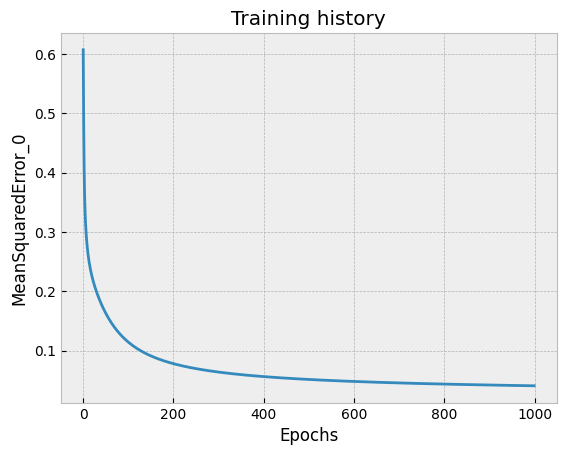

Model Error:
Accuracy: 0.98 (3 classes)
Confusion matrix: (rows true, columns pred)
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


In [2]:
import edunn as nn

# Load data, where `y` has "onehot" encoding
# `y` has as many columns as classes
# if example i is of class 2, for example, then
# y[i,2]=1 and the rest of the values of y[i,:] are 0
x, y, classes = nn.datasets.load_classification("iris", onehot=True)
# Data normalization
x = (x - x.mean(axis=0)) / x.std(axis=0)
n, din = x.shape
n, dout = y.shape

print("Dataset sizes:", x.shape, y.shape)

# Logistic Regression Model
model = nn.LogisticRegression(din, dout)
# Mean Squared Error
error = nn.MeanError(nn.SquaredError())
optimizer = nn.GradientDescent(lr=0.1, epochs=1000, batch_size=32)

# Optimization algorithm
history = optimizer.optimize(model, x, y, error)
nn.plot.plot_history(history, error_name=error.name)


print("Model Error:")
y_pred = model.forward(x)
nn.metrics.classification_summary_onehot(y, y_pred)
